### Task: Run and analyze an existing cellular automaton

* The code below implements the traffic simulator you saw in the previous activity.
* We use Sayama's pycxsimulator library to step through the cellular automaton simulation, which means that you can run this same code on your own computer.
* Run the code below.


In [35]:
interactive = False  # Set this variable to True to run an interactive
                     # simulator. This will not work on CoCalc.

import matplotlib


import pylab
import random
import numpy as np
import random as rd

In [56]:
a = list([0]*100)
a[0] =1
print(a)

[1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


In [103]:
class TrafficSimulator(object):

    # Mapping from the current state of a cell's neighborhood to the next state
    # of the cell. This corresponds to Wolfram's Rule 184.

    def __init__(self, length=50, density=0.2, interactive=False, pdown = 0.3, v_max = 5):

        self.interactive = interactive
        self.length = length
        self.density = density
        self.v_max = v_max
        self.pdown = pdown



        # Arrays for storing the current state and the next state (when we are
        # busy doing a state update).
        self.current_state = list([0]*self.length)
        self.next_state = list([0]*self.length)

    def initialize(self):
        '''
        This will be called by the interactive pycxsimulator whenever the Reset
        button is clicked.
        '''
        # Set up a random initial state where the fraction of 1s in the array
        # equals the density parameter.
        random_indices = np.random.choice(
            range(self.length),
            size=int(round((1-self.density) * self.length)),
            replace=False)
        for i in random_indices:
            self.current_state[i] = -1

        self.time = 0

    def draw(self):
        '''
        Draw the current state of the cellular automaton.
        '''
        print(''.join('.' if x == -1 else str(x) for x in self.current_state))
#         if self.interactive:
#             pylab.cla()  # Clear the current figure
#         else:
#             pylab.figure()  # Create a new figure
#         pylab.pcolor(
#             self.current_state.reshape((1, self.length)),
#             vmin = 0,
#             vmax = self.v_max,
#             cmap = pylab.cm.binary)
#         pylab.axis('image')
#         pylab.title('density = ' + str(self.density) + '; t = ' + str(self.time))
#         if not self.interactive:
#             pylab.show()

    def step(self):
        '''
        Update the state of the cellular automaton.
        '''
        # Update all cells, except the boundaries.
        for i in range(0, self.length - 1):
            new_speed = 0
            space = 0
            if self.current_state[i] == -1:
                pass
            else:
                #find 
                for j in range(1,6):
                    if self.current_state[i+j] == -1:
                        space += 1
                    else:
                        space += 1
                        break
                if rd.random() <= self.pdown:
                    new_speed = self.current_state[i] - 1
                #remain max speed
                else:
                    #remain max speed
                    if self.current_state[i] == self.v_max and space > self.v_max:
                        new_speed = self.current_state[i]

                    #accelerate
                    elif self.current_state[i] < self.v_max:
                        if space > self.current_state[i] + 1:
                            new_speed = self.current_state[i] + 1
                        else:
                            new_speed = self.current_state[i]
                    #decelerate
                    elif space < self.current_state[i]:
                        new_speed =  space - 1
                    print(i, self.current_state[i], space, new_speed)    
#             distance = new_speed
            self.next_state[(i+new_speed)//self.length] = new_speed
            self.next_state[i] = -1            

        self.current_state, self.next_state = self.next_state, self.current_state
        self.time += 1

    def set_density(self, value=None):
        '''
        The density of cars on the road. Only affects initialization (reset) of
        the simulation. The density must be a value between 0 and 1.
        '''
        if value is not None:
            self.density = min(1, max(0, float(value)))
        return self.density

In [104]:
sim = TrafficSimulator(density=0.4,length = 50, interactive=interactive)



    # Run the simulator for 100 steps and show some of the steps.:
print('Initial state:')
sim.initialize()
sim.draw()

print('Next 5 states:')
for i in range(5):
    sim.step()
    sim.draw()
    print('')

#     print('After 100 steps:')
#     for i in range(95):
#         sim.step()
#     sim.draw()


Initial state:
.0..0..00.......000......0.00.00...0..0.0..00..000
Next 5 states:
1 0 3 1
4 0 3 1
7 0 1 0
8 0 5 1
17 0 1 0
25 0 2 1
27 0 1 0
28 0 2 1
30 0 1 0
31 0 4 1
35 0 3 1
40 0 3 1
43 0 1 0
44 0 3 1
47 0 1 0
.................................................0

0................................................0

0 0 5 1
0................................................0

0.................................................

0 0 5 1
0................................................0



Initial state:


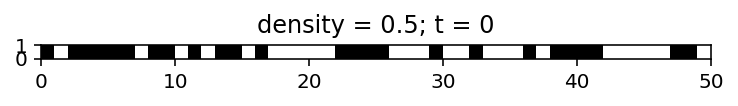

Next 5 states:


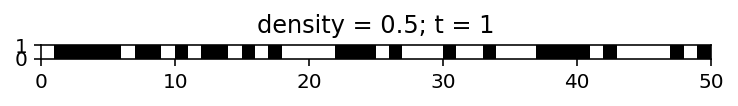

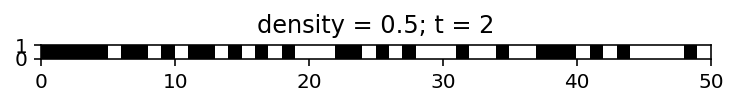

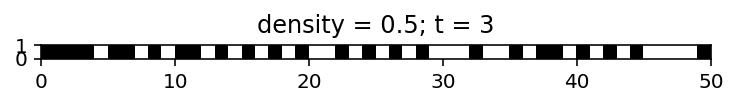

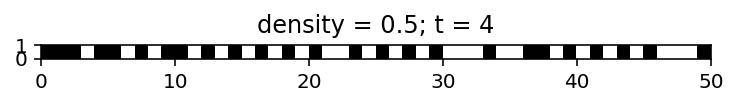

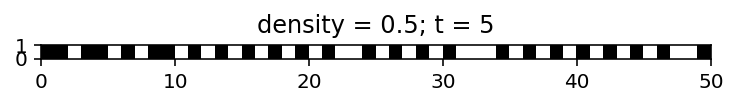


After 100 steps:


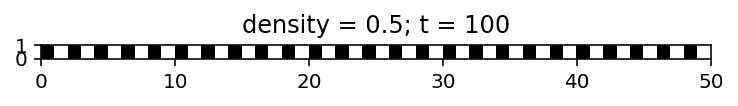

In [4]:
sim = TrafficSimulator(density=0.5, interactive=interactive)

if interactive:
    # Set up the interactive user interface.
    import pycxsimulator
    gui = pycxsimulator.GUI(parameterSetters=[sim.set_density])
    gui.start(func=[sim.initialize, sim.draw, sim.step])

else:
    # Run the simulator for 100 steps and show some of the steps.
    print('Initial state:')
    sim.initialize()
    sim.draw()

    print('Next 5 states:')
    for i in range(5):
        sim.step()
        sim.draw()
        print('')

    print('After 100 steps:')
    for i in range(95):
        sim.step()
    sim.draw()


Initial state:


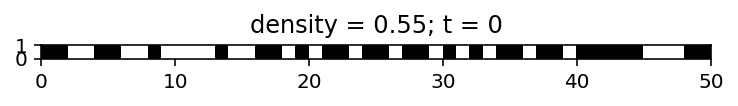

Next 5 states:


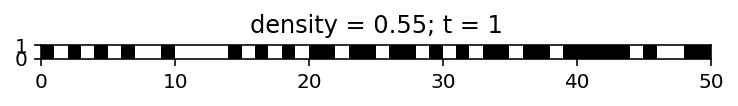

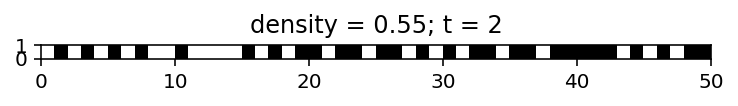

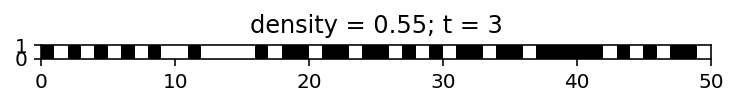

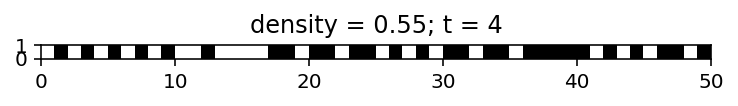

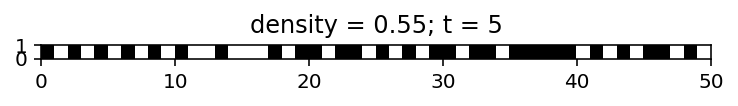


After 100 steps:


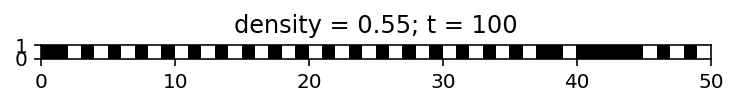

In [5]:
sim = TrafficSimulator(density=0.55, interactive=interactive)

if interactive:
    # Set up the interactive user interface.
    import pycxsimulator
    gui = pycxsimulator.GUI(parameterSetters=[sim.set_density])
    gui.start(func=[sim.initialize, sim.draw, sim.step])

else:
    # Run the simulator for 100 steps and show some of the steps.
    print('Initial state:')
    sim.initialize()
    sim.draw()

    print('Next 5 states:')
    for i in range(5):
        sim.step()
        sim.draw()
        print('')

    print('After 100 steps:')
    for i in range(95):
        sim.step()
    sim.draw()


### Next steps

* You have now seen the results for a single run of the simulator.
* Run the simulator multiple times, but using different settings of the density parameter.
* **Question:** If each black square represents a car and each white square represents open road, how does the state after 100 steps depend on the density parameter setting?
* Discuss with each other how the code works. In the next session you will be expected to write your own simulator of a cellular automaton, so make sure that you are comfortable with this Python implementation of a cellular automaton.

In [3]:
import numpy as np
np.random.choice(
            range(50),
            size=int(round(0.5 * 50)),
            replace=False)

array([ 6, 23, 25, 17, 37, 18, 13, 24, 28, 44, 21, 41, 29, 12, 30, 42,  9,
       47, 26, 16,  1,  2,  5, 19, 31])

In [23]:
a = np.zeros(50)
a.fill(0)
print(a)

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0.]


In [20]:
    type(np.zeros(50)[1])

numpy.float64

In [21]:
type(a[1])

numpy.float64

In [26]:
type(np.zeros(50))

numpy.ndarray